In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM

# Load Dataset
file_path = "/content/rainfall.csv";
df = pd.read_csv(file_path)

# Selecting relevant columns
columns_needed = ["Temp9am", "Humidity9am", "WindSpeed9am", "Cloud9am", "RainTomorrow"]
df = df[columns_needed]

# Handle missing values
df.dropna(inplace=True)

# Encode target variable
label_encoder = LabelEncoder()
df["RainTomorrow"] = label_encoder.fit_transform(df["RainTomorrow"])

# Splitting features and target
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

# Handling class imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standardizing features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Reshaping for LSTM
X_resampled = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build BiLSTM Model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final Model Accuracy: {accuracy * 100:.2f}%")


# Manual Input Prediction
def manual_prediction():
    temp = float(input("Enter Temperature : "))
    humidity = float(input("Enter Humidity : "))
    wind_speed = float(input("Enter Wind Speed : "))
    cloud = float(input("Enter Cloud Cover : "))

    user_input = np.array([[temp, humidity, wind_speed, cloud]])
    user_input = scaler.transform(user_input)
    user_input = user_input.reshape((1, user_input.shape[1], 1))

    prediction = model.predict(user_input)
    result = "Yes" if prediction[0][0] > 0.5 else "No"
    print(f"Will it rain ? {result}")

# Call function for manual input
manual_prediction()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3376/3376 ━━━━━━━━━━━━━━━━━━━━ 62s 14ms/step - accuracy: 0.6818 - loss: 0.5991 - val_accuracy: 0.6925 - val_loss: 0.5716
Epoch 2/50
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.6928 - loss: 0.5781 - val_accuracy: 0.6956 - val_loss: 0.5694
Epoch 3/50
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.6924 - loss: 0.5745 - val_accuracy: 0.6958 - val_loss: 0.5688
Epoch 4/50
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.6938 - loss: 0.5738 - val_accuracy: 0.6959 - val_loss: 0.5686
Epoch 5/50
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.6976 - loss: 0.5719 - val_accuracy: 0.6907 - val_loss: 0.5693
Epoch 6/50
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.6985 - loss: 0.5701 - val_accuracy: 0.6977 - val_loss: 0.5680
Epoch 7/50
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.6932 - loss: 0.5743 - val_accuracy: 0.6972 - val_loss: 0.5664
Epoch 8/50
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.6966 - loss: 0.57

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
Will it rain ? Yes


<ipython-input-1-d00d6d03abbf>:16: DtypeWarning: Columns (2,4,6,11,12,13,14,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4427/4427 ━━━━━━━━━━━━━━━━━━━━ 60s 12ms/step - accuracy: 0.6832 - loss: 0.5966 - val_accuracy: 0.6963 - val_loss: 0.5682
Epoch 2/20
4427/4427 ━━━━━━━━━━━━━━━━━━━━ 78s 12ms/step - accuracy: 0.6948 - loss: 0.5753 - val_accuracy: 0.6965 - val_loss: 0.5664
Epoch 3/20
4427/4427 ━━━━━━━━━━━━━━━━━━━━ 86s 13ms/step - accuracy: 0.6945 - loss: 0.5747 - val_accuracy: 0.6996 - val_loss: 0.5668
Epoch 4/20
4427/4427 ━━━━━━━━━━━━━━━━━━━━ 78s 12ms/step - accuracy: 0.6931 - loss: 0.5754 - val_accuracy: 0.6963 - val_loss: 0.5715
Epoch 5/20
4427/4427 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.6964 - loss: 0.5716 - val_accuracy: 0.6995 - val_loss: 0.5646
Epoch 6/20
4427/4427 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.6943 - loss: 0.5736 - val_accuracy: 0.6987 - val_loss: 0.5652
Epoch 7/20
4427/4427 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.6959 - loss: 0.5735 - val_accuracy: 0.7000 - val_loss: 0.5662
Epoch 8/20
4427/4427 ━━━━━━━━━━━━━━━━━━━━ 51s 12ms/step - accuracy: 0.6994 - loss: 0.57

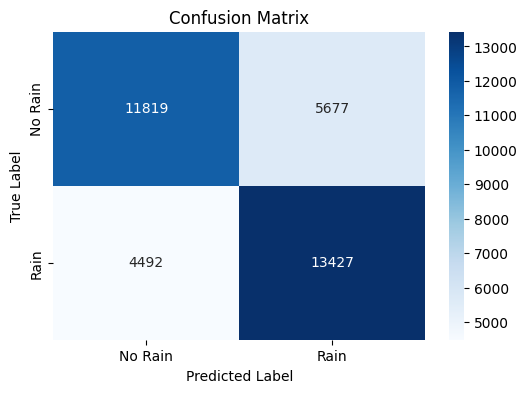

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Load Dataset
file_path = "drive/MyDrive/rainfall.csv";
df = pd.read_csv(file_path, on_bad_lines='skip')

# Selecting relevant columns
columns_needed = ["Temp9am", "Humidity9am", "WindSpeed9am", "Cloud9am", "RainTomorrow"]
df = df[columns_needed]

# Handle missing values
df.dropna(inplace=True)

# Encode target variable
label_encoder = LabelEncoder()
df["RainTomorrow"] = label_encoder.fit_transform(df["RainTomorrow"])

# Splitting features and target
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

# Handling class imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standardizing features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Reshaping for LSTM
X_resampled = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build BiLSTM Model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
#loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Final Model Accuracy: {accuracy * 100:.2f}%")



# Generate predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()